# Introduction

This notebook contains the analysis of weekly snowall in montreal from 2016 to 2022. We will aggregate all the data regarding the snow recovered from the snow removal strategy while comparing the actual snowfall.

In [37]:
#!pip install ipython
#!conda install -c conda-forge tslearn -y
from IPython.display import display

In [38]:
import pandas as pd
from pandas.tseries.frequencies import to_offset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

from pathlib import Path
import functions
import joblib

# Preprocessing datasets

# Importing Snow recovery data

In [39]:
timestamp = 'DateDechargement'
df = []
for y in range(2016,2022):
    t = functions.generate_source_path(name='transaction',year=y, prepath='../').absolute()
    dt = pd.read_csv(t, index_col=0, parse_dates=[timestamp, 'DateChargement'], low_memory=False) 
    
    col = ['IdentifiantDepot','TypeDepot']
    d = functions.generate_source_path(name='depot',year=y, prepath='../').absolute()
    dd = pd.read_csv(d, index_col=0, usecols=col) 
    print(dt.shape)
    m = dt.merge(dd, on='IdentifiantDepot', how='inner')
    print(m.shape)
    df.append(m) 

(338809, 13)
(338809, 14)
(432015, 13)
(432015, 14)
(349543, 13)
(349541, 14)
(320395, 13)
(320275, 14)
(251395, 13)
(251334, 14)
(260680, 13)
(260569, 14)


In [40]:
ddf = pd.concat(df, axis=0)

In [41]:
print(ddf.shape)
ddf.tail(4)


(1952543, 16)


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat
260565,2022-02-28 06:44:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-02-28 06:44:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104
260566,2022-10-14 09:05:40,NaN,VDM-01,28,VDM,Ville de Montréal,28,Sauvé (AHU),2022-10-14 09:05:40,0.00,N-AUT,1088.0,NaN,Chute_Egout,71.0,VDM
260567,2022-03-01 07:56:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-03-01 07:56:00,28.09,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104
260568,2022-01-19 16:20:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-01-19 16:20:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104


In [42]:
#df_time = functions.datetime_attributes(ddf,column=timestamp)
df_iso = functions.datetime_isocalendar(ddf,column=timestamp)
dfk = pd.concat([ddf, df_iso[['year','week']]],axis=1)
print(dfk.shape)
display(dfk.head(4))
display(dfk.tail(4))

(1952543, 18)


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
0,2016-12-13 10:45:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 10:53:27,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
1,2016-12-13 11:11:01,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:19:52,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
2,2016-12-13 11:35:02,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:46:32,59.64,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50
3,2016-12-13 10:57:00,104.0,SLA-353,13,SLA,Saint-Laurent,49,Thimens (SLA),2016-12-13 11:04:27,31.14,AUT,354.0,SLA-353,Entassement,NaN,NaN,2016,50


,DateChargement,Idenfiantsecteur,NomSecteur,IdentifiantArrondissement,ArrondissementCode,Arrondissement,IdentifiantDepot,NomDepot,DateDechargement,volume,TypeTransaction,IdentifiantContrat,NuméroContrat,TypeDepot,IdenfiantSecteur,NumeroContrat,year,week
260565,2022-02-28 06:44:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-02-28 06:44:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260566,2022-10-14 09:05:40,NaN,VDM-01,28,VDM,Ville de Montréal,28,Sauvé (AHU),2022-10-14 09:05:40,0.00,N-AUT,1088.0,NaN,Chute_Egout,71.0,VDM,2022,41
260567,2022-03-01 07:56:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-03-01 07:56:00,28.09,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,9
260568,2022-01-19 16:20:00,NaN,AHU-104,22,AHU,Ahuntsic / Cartierville,28,Sauvé (AHU),2022-01-19 16:20:00,32.90,N-AUT,980.0,NaN,Chute_Egout,339.0,AHU-104,2022,3


In [43]:
when = ['year','week']
who = 'ArrondissementCode'
what = 'volume'
how = 'TypeDepot'

In [44]:
when_who_how = when +[who] + [how]
print(when_who_how)

['year', 'week', 'ArrondissementCode', 'TypeDepot']


In [45]:
# 11-01 to 04-30  ->  w44 to  w52 | w1 to w18   -> drop w 19 to w 43
sel = dfk[~dfk['week'].between(19,43)]
print(sel['year'].unique())
sel = sel[sel['volume']>=0.01] # remove or not ( suppress the 2006 errors)
print(sel['year'].unique())

[2016 2017 2018 2019 2020 2021 2022 2006]
[2016 2017 2018 2019 2020 2021 2022]


In [46]:
print(sel.shape)

(1951968, 18)


In [47]:
sg = sel.groupby(by=when_who_how).agg({what:'sum'})
display(sg)

volume
year week ArrondissementCode TypeDepot            
2016 48   SLA                Entassement     25.00
     49   AHU                Chute_Egout     55.00
          S-O                Chute_Egout    110.00
          SLA                Chute_Egout     55.00
                             Entassement    110.00
...                                            ...
2022 12   SLA                Entassement     30.50
          VMA                Carierre      1000.00
          VSP                Carierre     10760.00
     13   PMR                Chute_Egout     43.71
                             Entassement     32.69

[2218 rows x 1 columns]

In [48]:
dfs = sg.reset_index()
dfs['yw'] = 100*dfs['year'] + dfs['week']
display(dfs)

,year,week,ArrondissementCode,TypeDepot,volume,yw
0,2016,48,SLA,Entassement,25.00,201648
1,2016,49,AHU,Chute_Egout,55.00,201649
2,2016,49,S-O,Chute_Egout,110.00,201649
3,2016,49,SLA,Chute_Egout,55.00,201649
4,2016,49,SLA,Entassement,110.00,201649
...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212
2214,2022,12,VMA,Carierre,1000.00,202212
2215,2022,12,VSP,Carierre,10760.00,202212
2216,2022,13,PMR,Chute_Egout,43.71,202213


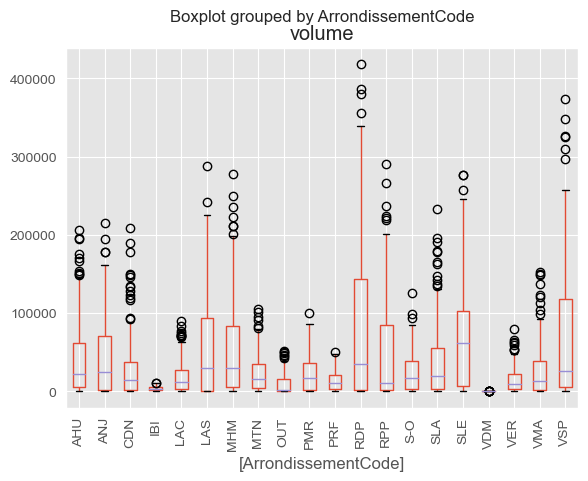

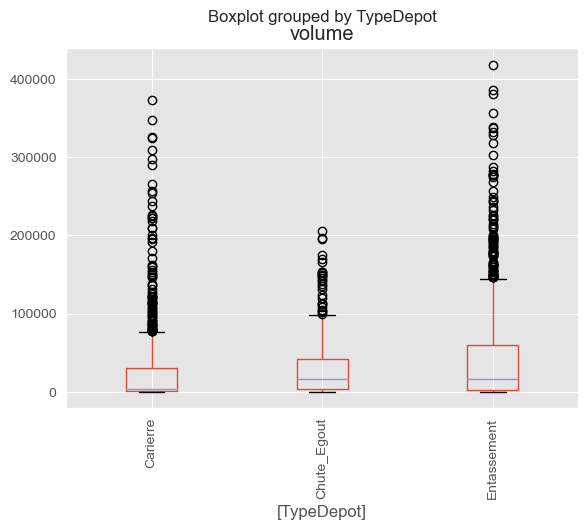

In [49]:
boxplot = dfs[['TypeDepot', 'ArrondissementCode', 'volume']].boxplot(by=['ArrondissementCode'], rot=90)

boxplot = dfs[['TypeDepot', 'ArrondissementCode', 'volume']].boxplot(by=['TypeDepot'], rot=90)


In [50]:
table_strategy_by_time = pd.pivot_table(dfs, values=what, index='yw',
                       columns=how, aggfunc=np.sum, fill_value=0)
table_strategy_by_time

TypeDepot,Carierre,Chute_Egout,Entassement
yw,,,
201648,0.00,0.00,25.00
201649,0.00,220.00,110.00
201650,246099.56,263787.07,567067.38
201651,14205.71,4681.87,6456.05
201652,134595.56,99887.06,291344.58
...,...,...,...
202209,365781.42,253933.46,981124.16
202210,45023.90,3142.35,9268.90
202211,27045.80,2356.83,4454.00


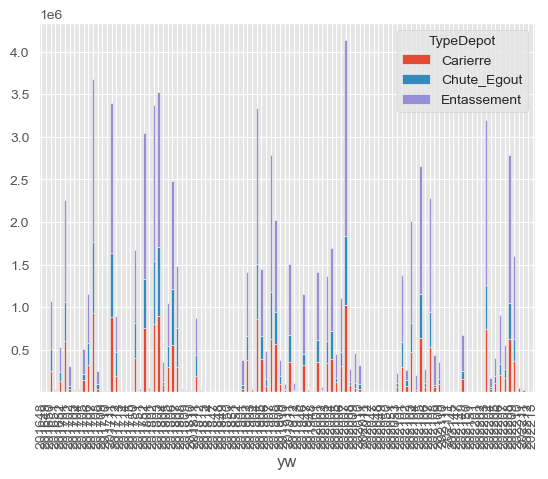

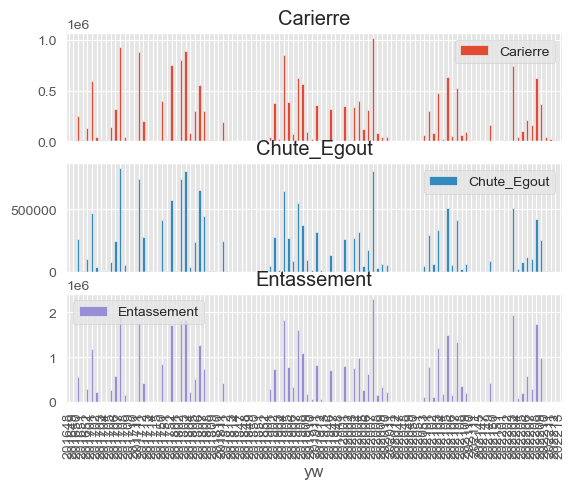

In [51]:
table_strategy_by_time.plot.bar(stacked=True)


axes = table_strategy_by_time.plot.bar(rot=90, subplots=True,)
axes[-1].legend(loc=2)  

In [52]:
table_strategy_by_arrondissement = pd.pivot_table(dfs, values=what, index=who,
                       columns=how, aggfunc=np.sum, fill_value=0)
display(table_strategy_by_arrondissement)

TypeDepot,Carierre,Chute_Egout,Entassement
ArrondissementCode,,,
AHU,2596238.57,4187673.98,696351.82
ANJ,467.39,0.00,4137885.07
CDN,745528.96,395836.28,3408333.31
IBI,0.00,0.00,234860.94
LAC,0.00,1034225.80,1475551.95
LAS,99.45,1396.87,4810711.89
MHM,27212.75,1983481.28,4945195.65
MTN,1707841.28,479065.05,1805789.39
OUT,616596.08,0.00,432500.38


,year,TypeDepot,volume
0,2016,Carierre,394900.83
1,2016,Chute_Egout,368576.00
2,2016,Entassement,865003.01
3,2017,Carierre,4369870.22
4,2017,Chute_Egout,3758712.66
5,2017,Entassement,9193198.54
6,2018,Carierre,3207664.93
7,2018,Chute_Egout,3207057.96
8,2018,Entassement,6904857.47
9,2019,Carierre,3783749.09


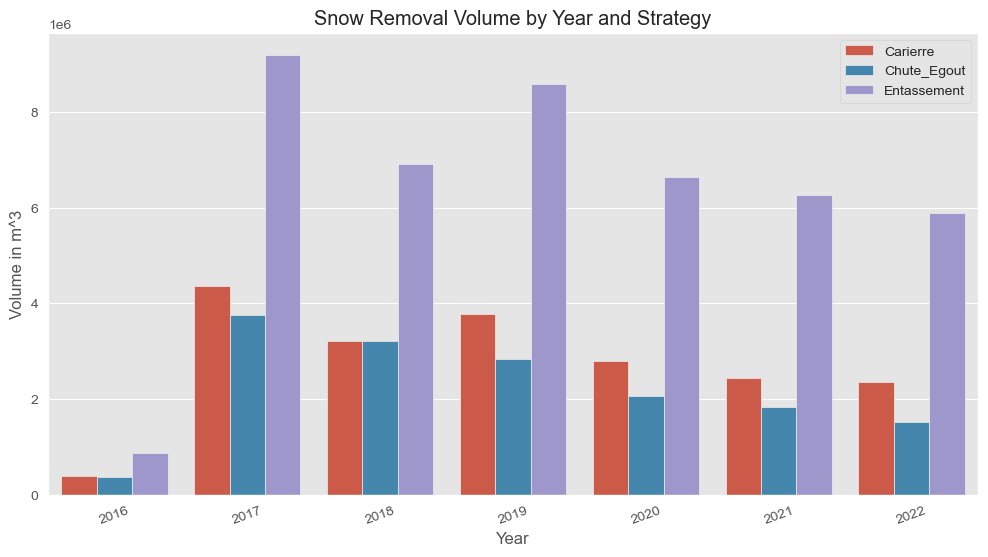

In [53]:
transactions_strategy_sum =  dfs.groupby(by=["year", "TypeDepot"])["volume"].sum()
transactions_strategy_sum = transactions_strategy_sum.reset_index()
display(transactions_strategy_sum)

plt.figure(figsize=(12, 6))
sns.barplot(x="year", y="volume", hue="TypeDepot", data=transactions_strategy_sum)
plt.legend(loc="best")
plt.xticks(rotation=20)
#plt.yscale("log")
plt.title("Snow Removal Volume by Year and Strategy")
plt.xlabel("Year")
plt.ylabel("Volume in m^3")
plt.show()

# JOINING WEATHER

In [54]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

In [55]:
# Set time period
start = datetime(2016, 11, 1)
end = datetime(2023, 5, 1)


In [56]:
# MONTREAL
MONTREAL_WMO_ID = 71627
data = Daily(MONTREAL_WMO_ID, start, end)
data = data.fetch()


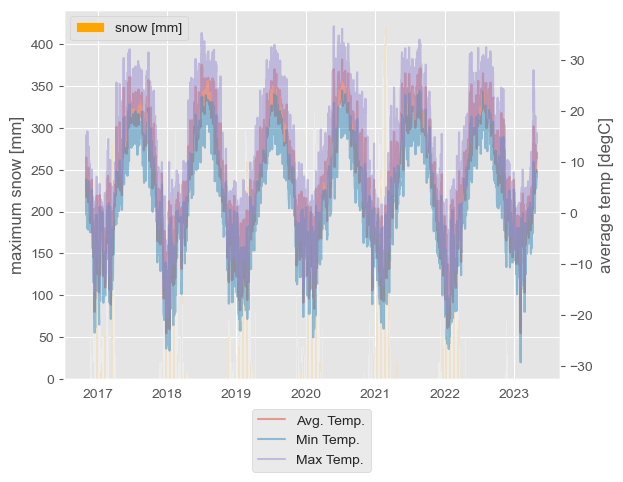

In [57]:
x = data.index
average_temp = data[['tavg', 'tmin', 'tmax']]

# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
ax1.bar(x, data['snow'], width=0.5, color='orange')
ax1.set_ylabel('maximum snow [mm]')

# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2
ax2.plot(x, average_temp, alpha=0.5) 
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('average temp [degC]')
#ax1.set_ylim(0, 35)
ax2.legend(['Avg. Temp.', 'Min Temp.', 'Max Temp.'],
            #loc="upper left"
            bbox_to_anchor =(0.5,-0.27), loc='lower center'
            )
#ax2.set_ylim(0, 1000)
ax1.legend(['snow [mm]'], loc="best")
plt.show()

In [58]:
weather = data.add_prefix('w_')
weather['date'] = weather.index
df_iso = functions.datetime_isocalendar(weather,column='date')
dweather = pd.concat([weather, df_iso[['year','week']]],axis=1)
display(dweather.head())
dweather = dweather.groupby(by=when).agg({'w_snow':'sum','w_tavg':'mean',
                                          'w_tmin':'min','w_tmax':'max',
                                          'w_wspd':'mean','w_prcp':'sum'}).reset_index()
display(dweather)

,w_tavg,w_tmin,w_tmax,w_prcp,w_snow,w_wdir,w_wspd,w_wpgt,w_pres,w_tsun,date,year,week
time,,,,,,,,,,,,,
2016-11-01,5.5,-0.3,11.2,0.4,NaN,127.0,13.6,NaN,1023.0,NaN,2016-11-01,2016,44
2016-11-02,10.9,6.6,15.2,0.0,NaN,NaN,8.5,NaN,1020.0,NaN,2016-11-02,2016,44
2016-11-03,8.2,5.6,10.7,10.0,NaN,9.0,11.6,NaN,1015.5,NaN,2016-11-03,2016,44
2016-11-04,3.1,0.5,5.6,0.4,NaN,288.0,14.8,NaN,1021.4,NaN,2016-11-04,2016,44
2016-11-05,5.4,2.2,8.6,1.2,NaN,NaN,8.8,NaN,1018.9,NaN,2016-11-05,2016,44


,year,week,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,44,0.0,6.150000,-1.6,15.2,11.583333,12.4
1,2016,45,0.0,5.457143,-3.3,16.0,19.357143,2.0
2,2016,46,10.0,5.928571,-1.1,13.1,14.966667,18.6
3,2016,47,160.0,-0.314286,-3.8,2.5,16.033333,9.2
4,2016,48,0.0,1.985714,-3.9,8.5,18.657143,36.0
...,...,...,...,...,...,...,...,...
335,2023,14,0.0,2.542857,-4.0,10.0,18.971429,33.0
336,2023,15,0.0,13.785714,1.0,28.0,20.457143,0.1
337,2023,16,0.0,8.071429,0.0,19.0,21.800000,43.0
338,2023,17,0.0,9.685714,4.8,15.7,13.342857,8.0


In [59]:
dfs2 = dfs.merge(dweather, on=['year','week'], how='left') 
print(dfs.shape, dfs2.shape)
display(dfs2)

(2218, 6) (2218, 12)


,year,week,ArrondissementCode,TypeDepot,volume,yw,w_snow,w_tavg,w_tmin,w_tmax,w_wspd,w_prcp
0,2016,48,SLA,Entassement,25.00,201648,0.0,1.985714,-3.9,8.5,18.657143,36.0
1,2016,49,AHU,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
2,2016,49,S-O,Chute_Egout,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
3,2016,49,SLA,Chute_Egout,55.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
4,2016,49,SLA,Entassement,110.00,201649,220.0,-4.214286,-13.7,3.1,14.485714,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...
2213,2022,12,SLA,Entassement,30.50,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2214,2022,12,VMA,Carierre,1000.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2215,2022,12,VSP,Carierre,10760.00,202212,0.0,1.957143,-9.5,9.0,19.257143,34.2
2216,2022,13,PMR,Chute_Egout,43.71,202213,0.0,-0.385714,-12.2,10.1,18.828571,4.2


# Adjusting to DWT

# Introduction

One of the questions we make to the dataset is the likelihood between neighborhoods and other aglomerative features. We will take the snow volume picked in each travel and agglomerate first by neighborhood.

We will treat each set of volume picked up as a time series. Later, we will compare each time series by applying a clustering algorithm with Dynamic Time Warping (DTW) to accomodate time series with different sizes.

In [60]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset, from_sktime_dataset, from_seglearn_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from tslearn.clustering import silhouette_score

In [61]:
min_length = 0
volume_series = dfs2.groupby(by=["year", "ArrondissementCode"])["volume"].apply(np.asarray)
#volume_series = dfs2.groupby(by=["ArrondissementCode", "TypeDepot"])["volume"].apply(np.asarray)
volume_series = volume_series[volume_series.apply(len) > min_length]
display(volume_series)


year  ArrondissementCode
2016  AHU                   [55.0, 31869.52, 69278.67, 671.42, 17731.16, 3...
      ANJ                                [179.79, 50151.33, 2536.3, 32212.85]
      CDN                   [12808.51, 25829.48, 31529.96, 616.13, 5725.3,...
      IBI                                                           [3201.33]
      LAC                   [16109.4, 20590.55, 901.8000000000001, 2484.8,...
                                                  ...                        
2022  SLE                   [618.8399999999999, 199377.63999999998, 6789.1...
      VDM                   [4.0, 2.0, 1.0, 30.8, 1.0, 259.48, 351.26, 2.0...
      VER                   [48123.89, 17651.329999999998, 9728.56, 10232....
      VMA                   [300.0, 320.0, 2748.66, 103443.22, 40561.5, 19...
      VSP                   [7165.0, 1225.0, 244020.15, 248.0, 19185.0, 36...
Name: volume, Length: 136, dtype: object

In [62]:

X_train = to_time_series_dataset(volume_series.values)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# X_train = TimeSeriesResampler(sz=64).fit_transform(X_train)

best_score = -np.inf
best_num_cluster = 0

for num_cluster in range(2, 21):
    kmeans = TimeSeriesKMeans(n_clusters=num_cluster, metric="dtw", n_jobs=-1, max_iter=250, random_state=42)
    kmeans.fit(X_train)
    y_pred = kmeans.predict(X_train)
    score = silhouette_score(X_train, y_pred)
    print(f"Score: {score:.3f}\tNum Cluster: {num_cluster}")
    if score > best_score:
        best_score = score
        best_num_cluster = num_cluster
        best_model = kmeans
        best_predictions = y_pred
print(f"Best Model has {best_score} of Silhouette Score and {best_num_cluster} clusters")


Score: 0.142	Num Cluster: 2
Score: 0.090	Num Cluster: 3
Score: 0.123	Num Cluster: 4
Score: 0.128	Num Cluster: 5
Score: 0.133	Num Cluster: 6
Score: 0.143	Num Cluster: 7
Score: 0.166	Num Cluster: 8
Score: 0.156	Num Cluster: 9
Score: 0.152	Num Cluster: 10
Score: 0.135	Num Cluster: 11
Score: 0.101	Num Cluster: 12
Score: 0.098	Num Cluster: 13
Score: 0.097	Num Cluster: 14
Score: 0.123	Num Cluster: 15
Score: 0.078	Num Cluster: 16
Score: 0.115	Num Cluster: 17
Score: 0.127	Num Cluster: 18
Score: 0.086	Num Cluster: 19
Score: 0.082	Num Cluster: 20
Best Model has 0.16616282047466296 of Silhouette Score and 8 clusters


In [63]:
output_volume_series = volume_series.reset_index()
output_volume_series["labels"] = best_predictions
display(output_volume_series)

,year,ArrondissementCode,volume,labels
0,2016,AHU,"[55.0, 31869.52, 69278.67, 671.42, 17731.16, 3...",3
1,2016,ANJ,"[179.79, 50151.33, 2536.3, 32212.85]",3
2,2016,CDN,"[12808.51, 25829.48, 31529.96, 616.13, 5725.3,...",1
3,2016,IBI,[3201.33],5
4,2016,LAC,"[16109.4, 20590.55, 901.8000000000001, 2484.8,...",1
...,...,...,...,...
131,2022,SLE,"[618.8399999999999, 199377.63999999998, 6789.1...",3
132,2022,VDM,"[4.0, 2.0, 1.0, 30.8, 1.0, 259.48, 351.26, 2.0...",3
133,2022,VER,"[48123.89, 17651.329999999998, 9728.56, 10232....",6
134,2022,VMA,"[300.0, 320.0, 2748.66, 103443.22, 40561.5, 19...",7


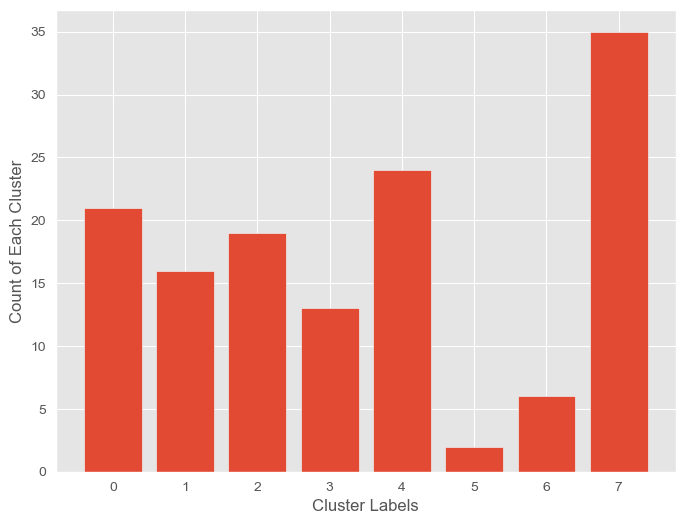

In [64]:
cluster_label, count_cluster = np.unique(best_predictions, return_counts=True)
plt.figure(figsize=(8, 6))
plt.bar(cluster_label, count_cluster)
plt.xlabel("Cluster Labels")
plt.ylabel("Count of Each Cluster")
plt.show()


In [65]:
output_volume_series_labels = output_volume_series.drop("volume", axis=1)

display(output_volume_series_labels)

,year,ArrondissementCode,labels
0,2016,AHU,3
1,2016,ANJ,3
2,2016,CDN,1
3,2016,IBI,5
4,2016,LAC,1
...,...,...,...
131,2022,SLE,3
132,2022,VDM,3
133,2022,VER,6
134,2022,VMA,7


In [66]:
joblib.dump(dfs2,Path('..','data','generated','descriptive_data.joblib'))

['../data/generated/descriptive_data.joblib']

In [109]:
k = pd.pivot_table(dfs, values=what, index=['year']+[who],
                       columns='week', aggfunc=np.sum, fill_value=0).add_prefix('w_')#.reset_index()
display(k)

week                        w_1     w_2        w_3       w_4       w_5  \
year ArrondissementCode                                                  
2016 AHU                    0.0     0.0       0.00      0.00      0.00   
     ANJ                    0.0     0.0       0.00      0.00      0.00   
     CDN                    0.0     0.0       0.00      0.00      0.00   
     IBI                    0.0     0.0       0.00      0.00      0.00   
     LAC                    0.0     0.0       0.00      0.00      0.00   
...                         ...     ...        ...       ...       ...   
2022 SLE                    0.0     0.0  199996.48   6789.15  11120.52   
     VDM                    0.0     0.0       0.00      6.00     31.80   
     VER                    0.0     0.0   65775.22  19961.07    958.00   
     VMA                  300.0   320.0  146753.38   2212.50  45061.49   
     VSP                 7165.0  1225.0  244268.15  19185.00  36696.11   

week                          w_6       w_7        w_8        w_9      w_10  \
year ArrondissementCode                                                       
2016 AHU                     0.00      0.00       0.00       0.00      0.00   
     ANJ                     0.00      0.00       0.00       0.00      0.00   
     CDN                     0.00      0.00       0.00       0.00      0.00   
     IBI                     0.00      0.00       0.00       0.00      0.00   
     LAC                     0.00      0.00       0.00       0.00      0.00   
...                           ...       ...        ...        ...       ...   
2022 SLE                 59192.65  16107.12  197556.69   82827.58      0.00   
     VDM                     1.00      0.00     259.48     351.26      2.00   
     VER                 37334.19   6541.74   59334.35   35647.95   3142.35   
     VMA                 16958.34  51181.88  105839.70   54678.04    475.00   
     VSP                 75542.19  87153.46  197104.87  115342.98  35905.00   

week                     ...  w_15  w_45  w_46  w_47  w_48  w_49       w_50  \
year ArrondissementCode  ...                                                  
2016 AHU                 ...   0.0   0.0   0.0   0.0   0.0  55.0  101148.19   
     ANJ                 ...   0.0   0.0   0.0   0.0   0.0   0.0   50331.12   
     CDN                 ...   0.0   0.0   0.0   0.0   0.0   0.0   70167.95   
     IBI                 ...   0.0   0.0   0.0   0.0   0.0   0.0    3201.33   
     LAC                 ...   0.0   0.0   0.0   0.0   0.0   0.0   36699.95   
...                      ...   ...   ...   ...   ...   ...   ...        ...   
2022 SLE                 ...   0.0   0.0   0.0   0.0   0.0   0.0       0.00   
     VDM                 ...   0.0   0.0   0.0   0.0   0.0   0.0       0.00   
     VER                 ...   0.0   0.0   0.0   0.0   0.0   0.0       0.00   
     VMA                 ...   0.0   0.0   0.0   0.0   0.0   0.0       0.00   
     VSP                 ...   0.0   0.0   0.0   0.0   0.0   0.0       0.00   

week                        w_51      w_52  w_53  
year ArrondissementCode                           
2016 AHU                  671.42  50014.01   0.0  
     ANJ                 2536.30  32212.85   0.0  
     CDN                  616.13  19393.93   0.0  
     IBI                    0.00      0.00   0.0  
     LAC                 3386.60  13971.90   0.0  
...                          ...       ...   ...  
2022 SLE                    0.00      0.00   0.0  
     VDM                    0.00      0.00   0.0  
     VER                    0.00      0.00   0.0  
     VMA                    0.00      0.00   0.0  
     VSP                    0.00      0.00   0.0  

[136 rows x 24 columns]

In [116]:
s = pd.pivot_table(dweather, values='w_snow', index=['year'],
                       columns='week', aggfunc=np.sum, fill_value=0).add_prefix('w_')#.reset_index()#.drop(columns='week')
display(s)

week,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10,...,w_44,w_45,w_46,w_47,w_48,w_49,w_50,w_51,w_52,w_53
year,,,,,,,,,,,,,,,,,,,,,
2016,0,0,0,0,0,0,0,0,0,0,...,0,0,10,160,0,220,890,680,610,0
2017,750,400,150,230,390,530,1690,230,0,0,...,0,0,20,20,40,0,320,500,880,0
2018,800,1150,1200,670,740,1430,1630,490,60,150,...,0,0,160,320,120,20,60,0,30,0
2019,120,270,310,900,1020,800,1500,1560,1560,1440,...,0,0,260,200,10,160,70,150,0,0
2020,580,450,670,830,740,1130,2070,1970,1420,900,...,0,10,0,30,90,0,40,0,140,300
2021,670,700,1940,1700,1940,2470,2330,2760,2030,1200,...,0,0,0,40,60,100,100,300,350,0
2022,420,350,740,820,1060,940,680,800,1130,510,...,0,0,260,130,0,0,0,0,0,0
2023,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:

dw = pd.pivot(data=dweather,columns='week',index='w_snow')
display(dw)

ValueError: Index contains duplicate entries, cannot reshape

In [91]:
dweather.unstack(level='week')

KeyError: 'Requested level (week) does not match index name (None)'

In [95]:
from tslearn.metrics import dtw, dtw_path

In [119]:
#dtw()

x = k.xs((2016,'AHU'))
xn = x.to_numpy()

sy = s.xs((2016))
syn = sy.to_numpy()

print(xn, syn)
r = dtw(xn, syn)
print(r)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.5000000e+01
 1.0114819e+05 6.7142000e+02 5.0014010e+04 0.0000000e+00] [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10 160   0 220 890 680 610   0]


In [121]:
k[]

111650.33216597523
